In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
IMG_SIZE=224
BATCH_SIZE=32

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [4]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Intern/Sara/alzhers all",
                                                   target_size=(IMG_SIZE,IMG_SIZE),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   subset='training')

Found 2422 images belonging to 4 classes.


In [5]:
val_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Intern/Sara/alzhers all",
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 605 images belonging to 4 classes.


In [8]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("class indices :",class_indices)
print("class names:",class_names)

class indices : {'alzher 1': 0, 'alzher 3': 1, 'alzhers 2': 2, 'alzhers 4': 3}
class names: ['alzher 1', 'alzher 3', 'alzhers 2', 'alzhers 4']


In [25]:


model=keras.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])


In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [28]:
model.fit(train_generator,epochs= 5,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 532s 7s/step - accuracy: 0.2957 - loss: 1.6708 - val_accuracy: 0.3686 - val_loss: 1.2103
Epoch 2/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 366s 5s/step - accuracy: 0.4823 - loss: 1.0919 - val_accuracy: 0.5124 - val_loss: 0.9233
Epoch 3/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 360s 5s/step - accuracy: 0.5731 - loss: 0.8345 - val_accuracy: 0.5322 - val_loss: 0.9036
Epoch 4/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 330s 4s/step - accuracy: 0.6342 - loss: 0.7100 - val_accuracy: 0.5504 - val_loss: 0.8579
Epoch 5/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 327s 4s/step - accuracy: 0.6801 - loss: 0.6288 - val_accuracy: 0.5256 - val_loss: 0.8426


In [38]:
model.save('/content/drive/MyDrive/Intern/Sara/alzhers all/sara.h5')

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualization
import numpy as np
model=load_model('/content/drive/MyDrive/Intern/Sara/alzhers all/sara.h5')
print("Model Loaded")

Model Loaded


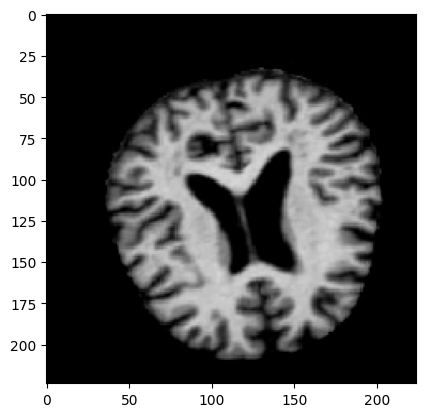

In [40]:
test_image_path='/content/drive/MyDrive/Intern/Sara/alzhers all/alzher 1/e00aafc9-ffea-4121-9bcd-1fa80c0edea6.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [41]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [42]:
prediction=model.predict(img_array)
ind=np.argmax(prediction)
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
alzher 1
